In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
 
%matplotlib inline

In [2]:
df = pd.read_excel("Project_Data_set.xlsx", index_col = None)

In [3]:
df.head()

,Unnamed: 0,CASEID,HEALTH2,AGE2,EDUCCAT2,EMPSTAT4,POVERTY2,K6SCMON,K6SCYR,K6SCMAX,...,NODR30A,DR5DAY,MJEVER,MJYRTOT,MRDAYPYR,MRDAYPMO,MRDAYPWK,MJDAY30A,DEPNDALC,DEPNDMRJ
0,0,1,2.0,17,3,4,2.0,0,10.291153,0,...,0.0,0.0,2,0.0,0.000000,0.000000,0.0,0.0,0,0
1,1,2,2.0,8,3,2,1.0,12,21.000000,21,...,5.0,1.0,1,104.0,3.153398,14.484054,2.0,1.0,0,0
2,2,3,3.0,13,2,1,1.0,12,10.291153,12,...,0.0,0.0,2,0.0,0.000000,0.000000,0.0,0.0,0,0
3,3,4,3.0,16,2,1,2.0,15,24.000000,24,...,2.0,0.0,1,0.0,0.000000,0.000000,0.0,0.0,0,0
4,4,5,2.0,16,4,1,3.0,0,10.291153,0,...,0.0,0.0,2,0.0,0.000000,0.000000,0.0,0.0,0,0


In [4]:
df= df[['CASEID', 'HEALTH2', 'AGE2', 'EDUCCAT2', 'EMPSTAT4',
       'POVERTY2', 'K6SCMON', 'K6SCYR', 'K6SCMAX', 'ALCEVER', 'ALCYRTOT',
       'ALDAYPYR', 'ALDAYPMO', 'ALDAYPWK', 'ALCDAYS', 'NODR30A', 'DR5DAY',
       'MJEVER', 'MJYRTOT', 'MRDAYPYR', 'MRDAYPMO', 'MRDAYPWK', 'MJDAY30A',
       'DEPNDALC', 'DEPNDMRJ']]

In [5]:
col_names = list(df)
print (col_names)

['CASEID', 'HEALTH2', 'AGE2', 'EDUCCAT2', 'EMPSTAT4', 'POVERTY2', 'K6SCMON', 'K6SCYR', 'K6SCMAX', 'ALCEVER', 'ALCYRTOT', 'ALDAYPYR', 'ALDAYPMO', 'ALDAYPWK', 'ALCDAYS', 'NODR30A', 'DR5DAY', 'MJEVER', 'MJYRTOT', 'MRDAYPYR', 'MRDAYPMO', 'MRDAYPWK', 'MJDAY30A', 'DEPNDALC', 'DEPNDMRJ']


In [6]:
#create df for alcohol, weed and K6 variables

In [7]:
df_alc= df[['ALCYRTOT', 'ALDAYPYR', 'ALDAYPMO', 'ALDAYPWK', 'ALCDAYS', 'NODR30A', 'DR5DAY']]
df_mr= df[['MJYRTOT', 'MRDAYPYR', 'MRDAYPMO', 'MRDAYPWK', 'MJDAY30A']]
df_K6 = df[['K6SCMON', 'K6SCYR', 'K6SCMAX']]   

In [8]:
#PCA visualisation

PCA is effected by scale so we need to scale the features in our data before applying PCA. Use StandardScaler to help  standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [9]:
#standardization

EXAMPLE delete later
#   from sklearn.preprocessing import StandardScaler
#   features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
#   x = df.loc[:, features].values
# Separating out the target
#   y = df.loc[:,['target']].values
# Standardizing the features
#   x = StandardScaler().fit_transform(x)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaled_data_alc= StandardScaler().fit_transform(df_alc)
scaled_data_mr= StandardScaler().fit_transform(df_mr)
scaled_data_K6= StandardScaler().fit_transform(df_K6)

In [12]:
df_alc.shape


(40428, 7)

In [13]:
df_mr.shape

(40428, 5)

In [14]:
df_K6.shape

(40428, 3)

In [15]:
#scaled_data_K6 = scaler.transform(df_K6)

In [16]:
#PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. 
#We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().
#We can also specify how many components we want to keep when creating the PCA object.

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=1) #set how many dimensions

In [19]:
#pca.fit(scaled_data_alc)
#pca.fit(scaled_data_mr)
#pca.fit(scaled_data_K6)
#x_alc_pca = pca.transform(scaled_data_alc)

x_pca_alc =pca.fit_transform(scaled_data_alc)
x_pca_mr =pca.fit_transform(scaled_data_mr)
x_pca_K6 =pca.fit_transform(scaled_data_K6)

In [20]:
#Now we can transform this data to its first 2 principal components.

In [21]:
scaled_data_alc.shape #shape before

(40428, 7)

In [22]:
x_pca_alc.shape  #shape after (to check if worked)

(40428, 1)

We've reduced 27 dimensions to just 1. Delete: Let's plot these two dimensions out

plt.figure(figsize=(10,8)) 
plt.scatter(x_pca_alc[:,0], x_pca_alc[:,1], c=df['K6SCMON'], cmp='plasma')
            #,x_pca_alc[:,1], c=df['K6SCMON'],cmap = 'plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [23]:
#Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.
#The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

EXAMPLE delete later
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)  #or at mine principalComponents =as  x_pca_alc

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [24]:
df_comp_alc =pd.DataFrame(data=x_pca_alc, columns= ['PCA_alcohol1'])
df_comp_mr =pd.DataFrame(data=x_pca_alc, columns= ['PCA_marijuana'])
df_comp_K6 =pd.DataFrame(data=x_pca_alc, columns= ['PCA K6'])

In [25]:
pca.components_  #In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

array([[0.59929521, 0.49144534, 0.63192304]])

In [26]:
#df_comp = pd.DataFrame(pca.components_, columns=col_names) #,columns=df['columns'])

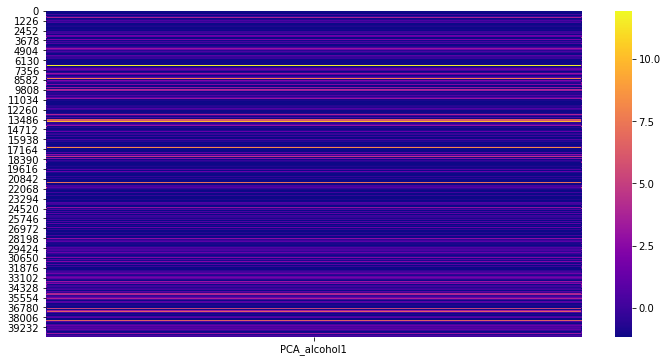

In [27]:
#delete this too, the heatmap doesn't say anything with 1 dimension
plt.figure(figsize=(12,6))
sns.heatmap(df_comp_alc,cmap='plasma',)

In [28]:
#This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

In [29]:
#now do regression on x_pca_alc, x_pca_mr, x_pca_K6 instead of whole df

##Regression on PCA 

In [33]:
df.columns

Index(['CASEID', 'HEALTH2', 'AGE2', 'EDUCCAT2', 'EMPSTAT4', 'POVERTY2',
       'K6SCMON', 'K6SCYR', 'K6SCMAX', 'ALCEVER', 'ALCYRTOT', 'ALDAYPYR',
       'ALDAYPMO', 'ALDAYPWK', 'ALCDAYS', 'NODR30A', 'DR5DAY', 'MJEVER',
       'MJYRTOT', 'MRDAYPYR', 'MRDAYPMO', 'MRDAYPWK', 'MJDAY30A', 'DEPNDALC',
       'DEPNDMRJ'],
      dtype='object')

In [43]:
df_PCA =df[['CASEID', 'HEALTH2', 'AGE2', 'EDUCCAT2', 'EMPSTAT4', 'POVERTY2', 'K6SCMON', 'K6SCYR', 'K6SCMAX']]

In [44]:
df_PCA.assign(x_pca_alc = x_pca_alc, x_pca_mr=x_pca_mr, x_pca_K6=x_pca_K6)


,CASEID,HEALTH2,AGE2,EDUCCAT2,EMPSTAT4,POVERTY2,K6SCMON,K6SCYR,K6SCMAX,x_pca_alc,x_pca_mr,x_pca_K6
0,1,2.0,17,3,4,2.000000,0,10.291153,0,-1.126704,-0.655059,-1.158244
1,2,2.0,8,3,2,1.000000,12,21.000000,21,-0.923998,0.656736,4.282998
2,3,3.0,13,2,1,1.000000,12,10.291153,12,-1.126704,-0.655059,1.782517
3,4,3.0,16,2,1,2.000000,15,24.000000,24,-0.604137,-0.655059,5.441132
4,5,2.0,16,4,1,3.000000,0,10.291153,0,-1.126704,-0.655059,-1.158244
5,9,2.0,15,3,3,3.000000,6,11.000000,11,0.766951,3.917360,0.962479
6,11,1.0,12,4,1,3.000000,2,10.291153,2,-1.126704,-0.655059,-0.668117
7,13,2.0,11,2,1,3.000000,2,10.291153,2,0.280434,11.348455,-0.668117
8,14,3.0,13,3,3,2.000000,10,16.000000,16,0.693153,-0.655059,2.757720
9,15,1.0,9,3,4,1.000000,11,10.291153,11,-1.126704,-0.655059,1.537453
